# Network Science - MDS - UDD 2024

# Tarea 2
## Ejercicio para calcular triadas abiertas, cerradas y el coeficiente de clustering

#### Cristian Candia-Castro Vallejos, Ph.D.$^{1,2}$
#### Adolfo Fuentes Jofré, Ph.D(s).$^{1}$


- [1] Data Science Institute (IDS), Universidad del Desarrollo,Chile
- [2] Northwestern Institute on Complex Systems, Kellogg School of Management, Northwestern Unviersity, USA



#### Importando Modulos Requeridos


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Supongamos que tienes una red social representada como un grafo no dirigido. Se te proporcionará la estructura del grafo, y tu tarea será:


In [ ]:
# Estructura del grafo proporcionada
G2 = nx.Graph()
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'C'), ('B', 'E'),
    ('C', 'D'), 
    ('D', 'E'), ('D', 'F')
]
G2.add_edges_from(edges)

In [33]:
# Matriz de adyacencia

adj_matrix = nx.adjacency_matrix(G2).todense()

adj_df = pd.DataFrame(adj_matrix, index=G2.nodes, columns=G2.nodes)

print("Matriz de Adyacencia:")
print(adj_df)


Matriz de Adyacencia:
   A  B  C  D  E  F
A  0  1  1  1  0  0
B  1  0  1  0  1  0
C  1  1  0  1  0  0
D  1  0  1  0  1  1
E  0  1  0  1  0  0
F  0  0  0  1  0  0


- Dibujar la Red

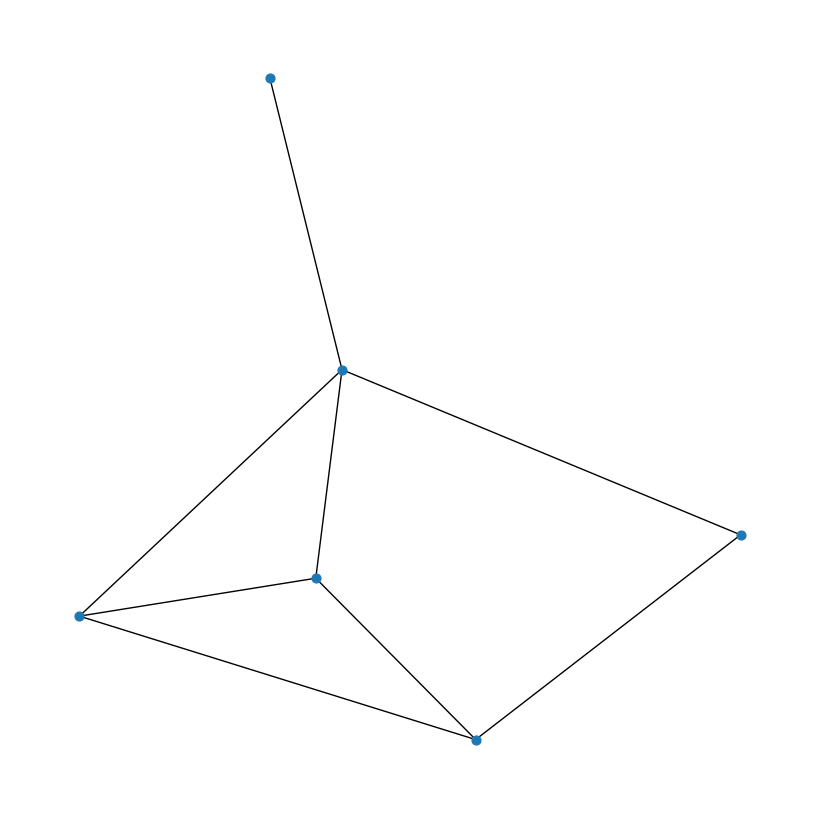

In [17]:
# Usando el algoritmo force-based o "spring" 
fig = plt.figure(figsize=(8,8))


nx.draw_spring(G2, node_size=40)

- Construir la distribución de grado

In [19]:
N = len(G2)
L = G2.size()
degrees2 = list(dict(G2.degree()).values())
kmin = min(degrees2)
kmax = max(degrees2)

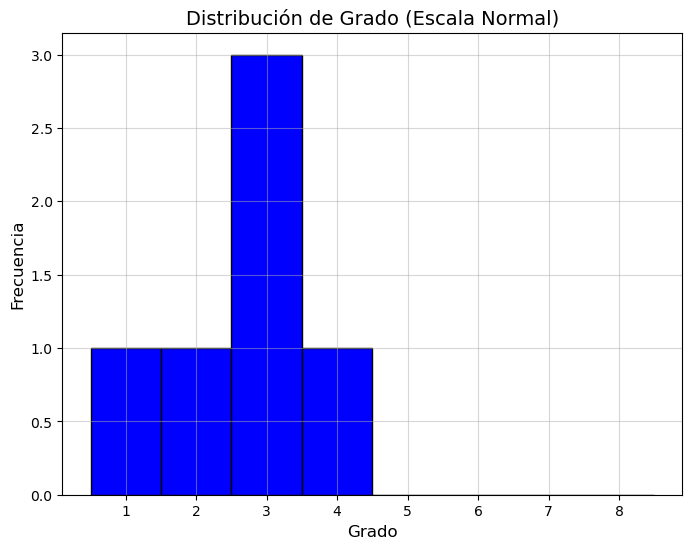

In [20]:
# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(degrees2, bins=range(1, max(degrees) + 2), align='left', color='blue', edgecolor='black')

# Configurar etiquetas y título
plt.title("Distribución de Grado (Escala Normal)", fontsize=14)
plt.xlabel("Grado", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(alpha=0.5)

# Mostrar el gráfico
plt.show()

- Identificar y contar las triadas abiertas y cerradas.

In [22]:
# Función para calcular triadas abiertas y cerradas
def calculate_triads(G2):
    open_triads = 0
    closed_triads = 0

    # Iterar sobre todos los nodos para identificar triadas
    for node in G2.nodes:
        neighbors = list(G2.neighbors(node))
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                if G2.has_edge(neighbors[i], neighbors[j]):
                    closed_triads += 1
                else:
                    open_triads += 1
    # Cada triángulo se cuenta tres veces, dividir por 3
    closed_triads //= 3
    return open_triads, closed_triads


In [27]:
# Calcular triadas
open_triads, closed_triads = calculate_triads(G2)

# Mostrar resultados
print("Triadas abiertas:", open_triads)
print("Triadas cerradas:", closed_triads)

Triadas abiertas: 10
Triadas cerradas: 2


- Calcular el coeficiente de clustering para cada nodo.

In [25]:
# Calcular coeficiente de clustering para cada nodo
clustering_coefficients = nx.clustering(G2)

# Mostrar el coeficiente de clustering para cada nodo
print("Coeficiente de clustering por nodo:")
for nodo, coef in clustering_coefficients.items():
    print(f"Nodo {nodo}: {coef}")

Coeficiente de clustering por nodo:
Nodo A: 0.6666666666666666
Nodo B: 0.3333333333333333
Nodo C: 0.6666666666666666
Nodo D: 0.16666666666666666
Nodo E: 0
Nodo F: 0


- Calcular el coeficiente de clustering promedio del grafo.

In [29]:
# Calcular coeficiente de clustering promedio
average_clustering = nx.average_clustering(G2)
print(f"Coeficiente de clustering promedio: {average_clustering:.2f}")

Coeficiente de clustering promedio: 0.31


- Interpretar los resultados